# KLASIFIKASI BUNGA IRIS (MODEL KNN)

### INSIGHT 5

### A. MODULES AND PACKAGES

In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### B. IMPORT DATA

In [302]:
df = pd.read_csv("iris.csv")
df.drop('Id', axis=1, inplace=True)

### C. EXPLORATORY DATA ANALYSIS (EDA)

In [303]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [304]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [305]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### D. PRE-PROCESSING

- memisahkan data feature dan label

In [306]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

- membagi data uji dan data latih

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

- Label Encoding

In [308]:
lb = LabelEncoder()
lb.fit(y_train)

y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

In [309]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


- Standarisasi

In [310]:
scaler = StandardScaler()
scaler.fit(X_train)
with open ('ss_scaler.pkl', 'wb') as mx_scl:
    pickle.dump(scaler, mx_scl)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

- mencari nilai konstanta k

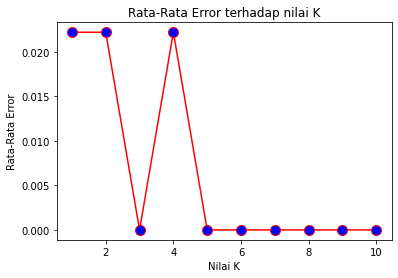

In [311]:
error = []

for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1, 11), error, color='red', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()

### E. TRAINING THE MODEL

In [312]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

### F. EVALUATION MODEL

In [313]:
accuracy_train = model_knn.score(X_train, y_train)
accuracy_test = model_knn.score(X_test,y_test)

In [314]:
print("Accuracy model (Train)", accuracy_train*100)
print("Accuracy model (Test))", accuracy_test*100)

Accuracy model (Train) 95.23809523809523
Accuracy model (Test)) 100.0


### G. SAVE THE MODEL

In [315]:
joblib.dump((model_knn), "model_iris_knn.model")

['model_iris_knn.model']

### H. PREDICTION

In [316]:
df_test = pd.DataFrame(data={
    "SepalLengthCm" : [5.0],
    "SepalWidthCm"  : [7.0],
    "PetalLengthCm" : [8.0],
    "PetalWidthCm"  : [2.0]
})

testing_data = scaler.transform(df_test)

In [317]:
pred_test = model_knn.predict(testing_data)
pred_test[0]

0

In [318]:
setosa = 0
versicolor = 1 
virginica = 2